## Transfer Learning with MobileNet and Cat/Dog Dataset

### Getting Images

In [11]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [8]:
X = []
y = []

def resize_image(input_dir, output_dir, output_size):
    for filename in os.listdir(input_dir):
        # Check if the file is an image
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            # Open the image file
            with Image.open(os.path.join(input_dir, filename)) as img:
                img = img.resize(output_size)

                # this is for jpegs
                if img.mode != 'RGB':
                    img = img.convert('RGB')
                
                X.append(np.asarray(img)/255)
                if input_dir == "Cats": y.append(0)
                else: y.append(1)
                
                img.save(os.path.join(output_dir, filename))
    print("Done resizing images from", input_dir)

In [9]:
resize_image("Cats", "Cats/resized", (224, 224))
resize_image("Dogs", "Dogs/resized", (224, 224))

Done resizing images from Cats
Done resizing images from Dogs


In [10]:
# X and y sets
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((1008, 224, 224, 3), (1008,))

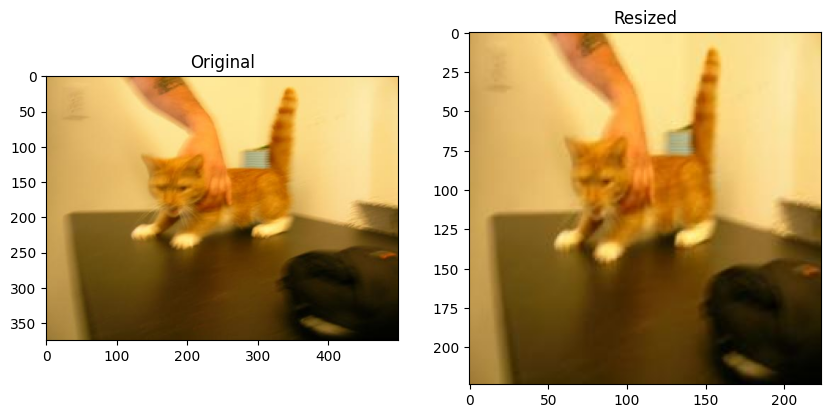

In [12]:
# For cats dataset
original_im = np.array(Image.open('Cats/0.jpg'))
resize_im = np.array(Image.open('Cats/resized/0.jpg'))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(original_im)
axs[0].set_title('Original')
axs[1].imshow(resize_im)
axs[1].set_title('Resized')

plt.show()

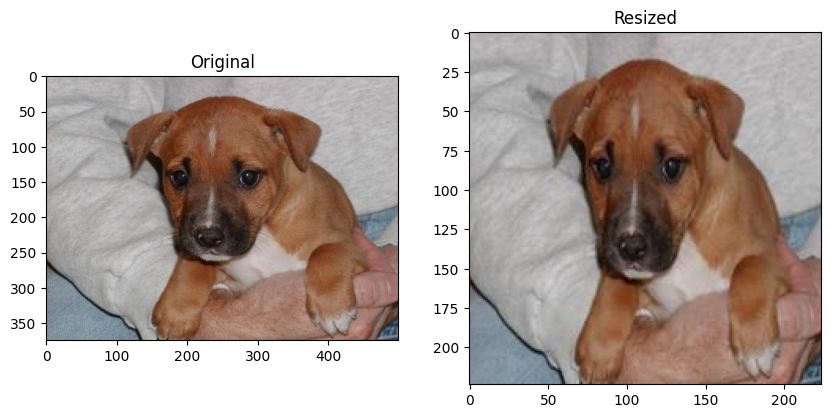

In [13]:
# For cats dataset
original_im = np.array(Image.open('Dogs/33.jpg'))
resize_im = np.array(Image.open('Dogs/resized/33.jpg'))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(original_im)
axs[0].set_title('Original')
axs[1].imshow(resize_im)
axs[1].set_title('Resized')

plt.show()

### Train and Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [16]:
X_train.shape, X_test.shape

((806, 224, 224, 3), (202, 224, 224, 3))

In [17]:
y_train.shape, y_test.shape

((806,), (202,))

### Fit Pretrained Model (Mobilenet)

In [19]:
import tensorflow as tf
import tensorflow_hub as hub

In [20]:
mobilenet = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet, input_shape=(224, 224, 3), trainable=False)

In [21]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model, 
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [26]:
model.compile(
    optimizer = 'adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [27]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
26/26 [==============================] - 24s 591ms/step - loss: 0.2001 - acc: 0.9330
Epoch 2/5
26/26 [==============================] - 15s 582ms/step - loss: 0.0683 - acc: 0.9789
Epoch 3/5
26/26 [==============================] - 14s 553ms/step - loss: 0.0468 - acc: 0.9888
Epoch 4/5
26/26 [==============================] - 14s 533ms/step - loss: 0.0331 - acc: 0.9950
Epoch 5/5
26/26 [==============================] - 14s 541ms/step - loss: 0.0240 - acc: 0.9963


In [28]:
score, acc = model.evaluate(X_test, y_test)
print("Test loss: ", score)
print("Test accuraacy:", acc)

7/7 [==============================] - 5s 502ms/step - loss: 0.0213 - acc: 0.9901
Test loss:  0.021275866776704788
Test accuraacy: 0.9900990128517151


### Try Model with a New Image

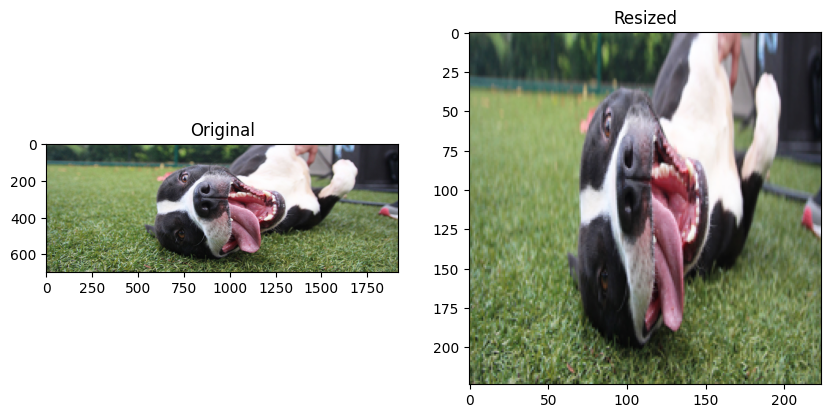

(1, 224, 224, 3)

In [30]:
original_img = Image.open("test_img.jpg")
resized_img = original_img.resize((224, 224))

original_im = np.array(original_img)
resize_im = np.array(resized_img)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(original_im)
axs[0].set_title('Original')
axs[1].imshow(resize_im)
axs[1].set_title('Resized')

plt.show()

test_img = np.asarray(resized_img)
test_img = test_img/255
test_img = np.reshape(test_img, (1,224,224,3))
test_img.shape

In [31]:
output = ["Cat", "Dog"]

predictions = model.predict(test_img)
print("Total predictions:", predictions)

prediction = np.argmax(predictions)
print("Predicted: ", output[prediction])

1/1 [==============================] - 1s 1s/step
Total predictions: [[-2.4601529  3.5487785]]
Predicted:  Dog
